## Data Analysis pipeline for all datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
df = pd.read_excel(r"C:\github\news\news\german-news\clean_data\xlsx\jungefreiheit.xlsx")
df

,news_outlet,provenance,query_keywords,creation_date,last_modified,crawl_date,author_person,author_organization,news_keywords,content_title,content_description,content_body,Fake News,Extreme bias,clickbait,credible
0,jungefreiheit,https://jungefreiheit.de/politik/deutschland/2...,"usa, spd, demo, ns, rna, us, ss, bundestagswah...",NaN,NaT,2024-11-21,NaN,NaN,"K-Frage, Lars Klingbeil, Pistorius Kanzlerkand...",Haengepartie Scholz gegen Pistorius: Wann ist ...,Die SPD bekommt die Debatte um ihren Kanzlerka...,Bei den Sozialdemokraten ist eine Debatte daru...,NaN,NaN,NaN,NaN
1,jungefreiheit,https://jungefreiheit.de/debatte/kommentar/202...,"schi, christ, ns, us, ss, sp",NaN,NaT,2024-11-21,NaN,NaN,"Berlin, Diskothek, Gender, Geschlechtsidentitaet",Zwei Seelen und 53 Geschlechter,Im Berliner Nachtleben geht es nicht nur ums p...,Wir befinden uns im Jahr 2024 nach Christus. G...,1.0,1.0,1.0,0.0
2,jungefreiheit,https://jungefreiheit.de/wirtschaft/2024/erbsc...,"usa, sp, spd, schi, politik, bruttoinlandsprod...",NaN,NaT,2024-11-21,NaN,NaN,"Erbschaftssteuer, Sozialpolitik, Wirtschaft",Erbschaftssteuer Alle dreissig Jahre ein Ader...,Die deutsche Erbschaftsteuer ist im internatio...,Eine aktuelle Studie zeigt: Nirgendwo in Europ...,NaN,NaN,NaN,NaN
3,jungefreiheit,https://jungefreiheit.de/kultur/2023/neo-rauch...,"regierung, schi, kultur, ns, us, ss, sp",NaN,NaT,2024-11-21,NaN,NaN,"Bundesregierung, Deutschland schafft sich ab, ...",Maler Neo Rauch: Ich liebe dieses Land,Der weltbekannte Kuenstler uebt scharfe Kritik...,LEIPZIG. Mit einem Bekenntnis zum Patriotismus...,NaN,NaN,NaN,NaN
4,jungefreiheit,https://jungefreiheit.de/politik/deutschland/2...,"muslim, asyl, schi, demo, ns, us, ss, afd, sp",NaN,NaT,2024-11-21,NaN,NaN,"AfD, Bundesamt fuer Verfassungsschutz, Junge A...",Verfassungsschutz darf AfD-Jugend als gesicher...,Die Junge Alternative wird vom Verfassungsschu...,Die Koelner Richter bestaetigten mit ihrem nun...,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,jungefreiheit,https://jungefreiheit.de/politik/deutschland/2...,"regierung, schi, ns, us, ss, spo, sp",NaN,NaT,2024-11-21,NaN,NaN,"9-Euro-Ticket, Bahn, Deutsche Polizeigewerksch...",Neun-Euro-Ticket: Polizeigewerkschaft warnt vo...,Das Neun-Euro-Ticket fuer den oeffentlichen Na...,BERLIN. Der Bundesvorsitzende der Deutschen Po...,NaN,NaN,NaN,NaN
1001,jungefreiheit,https://jungefreiheit.de/wirtschaft/2022/kfz-n...,"ukraine, frankreich, krieg, lockdown, corona, ...",NaN,NaT,2024-11-21,NaN,NaN,"Automobilhersteller, Automobilindustrie, Neuzu...",Neuzulassungen von Kraftfahrzeugen brechen ein,Die Neuzulassung von Kraftfahrzeugen ist in de...,BRUESSEL. Die Neuzulassung von Kraftfahrzeugen...,NaN,NaN,NaN,NaN
1002,jungefreiheit,https://jungefreiheit.de/politik/deutschland/2...,"muslim, spd, ns, rna, us, ss, sp",NaN,NaT,2024-11-21,NaN,NaN,"Antisemitismus, Freie Universitaet Berlin, Pro...",Berliner Universitaet darf antisemitischen Sch...,Nach der Pruegelattacke auf einen juedischen S...,BERLIN. Berlins Wissenschaftssenatorin Ina Czy...,NaN,NaN,NaN,NaN
1003,jungefreiheit,https://jungefreiheit.de/wirtschaft/2023/habec...,"xi, ns, us, ss, familie, sp, robert habeck",NaN,NaT,2024-11-21,NaN,NaN,"Foerderungen, Gebaeudeenergiegesetz, Gruene, H...",Habeck streicht Zuschuesse fuer Waermepumpen r...,"Der Gruene bricht sein Versprechen, die Umrues...",BERLIN. Um bis zu 9.000 Euro niedriger als der...,NaN,NaN,NaN,NaN


We will first have to get a look at our data and understand it

In [3]:
labels = ['Fake News', 'Extreme bias', 'clickbait', 'credible']
df[labels].sum()

Fake News       56.0
Extreme bias    60.0
clickbait       38.0
credible        20.0
dtype: float64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   news_outlet          1005 non-null   object        
 1   provenance           1005 non-null   object        
 2   query_keywords       1005 non-null   object        
 3   creation_date        0 non-null      float64       
 4   last_modified        17 non-null     datetime64[ns]
 5   crawl_date           1005 non-null   datetime64[ns]
 6   author_person        0 non-null      float64       
 7   author_organization  0 non-null      float64       
 8   news_keywords        1001 non-null   object        
 9   content_title        1005 non-null   object        
 10  content_description  1005 non-null   object        
 11  content_body         1002 non-null   object        
 12  Fake News            82 non-null     float64       
 13  Extreme bias         82 non-null 

plot of label distr

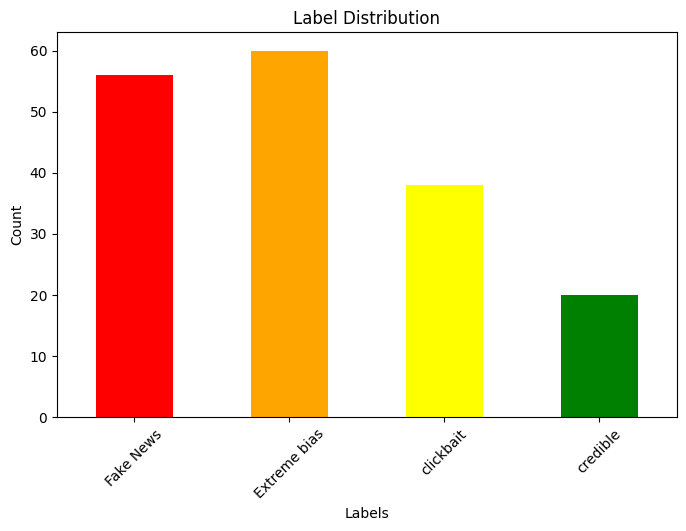

In [5]:
def plot_label_distribution(df, labels):
    label_counts = df[labels].sum()
    label_counts.plot(kind='bar', figsize=(8, 5), color=['red', 'orange', 'yellow', 'green'])
    plt.title('Label Distribution')
    plt.xlabel('Labels')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

labels = ['Fake News', 'Extreme bias', 'clickbait', 'credible']
plot_label_distribution(df, labels)

text length distribution

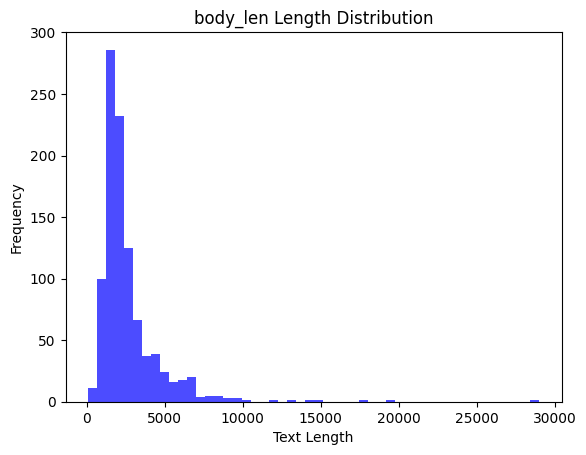

In [6]:
df['body_len'] = df['content_body'].str.len()

def plot_text_length_distribution(df, column):
    plt.hist(df[column], bins=50, color='blue', alpha=0.7)
    plt.title(f'{column} Length Distribution')
    plt.xlabel('Text Length')
    plt.ylabel('Frequency')
    plt.show()

plot_text_length_distribution(df, 'body_len')

len of article vs label

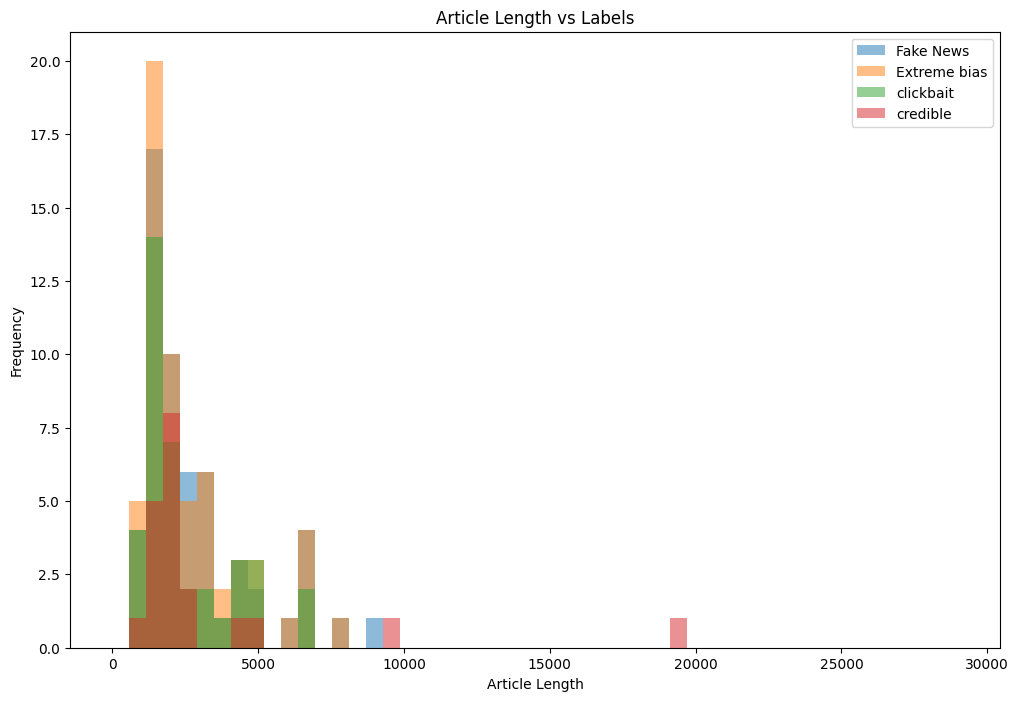

In [7]:
def plot_length_vs_label(df, labels, length_column):
    plt.figure(figsize=(12, 8))
    for label in labels:
        filtered = df[df[label] == 1]
        plt.hist(
            filtered[length_column], 
            bins=50, 
            alpha=0.5, 
            label=label,
            range=(0, df[length_column].max())
        )
    plt.title(f'Article Length vs Labels')
    plt.xlabel('Article Length')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

plot_length_vs_label(df, labels, 'body_len')

visualize bodies

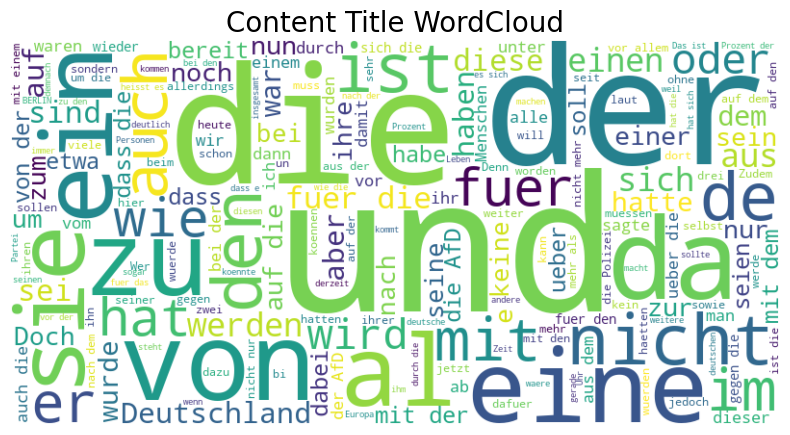

In [8]:
def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()

create_wordcloud(df['content_body'].dropna(), 'Content Title WordCloud')

visualize title

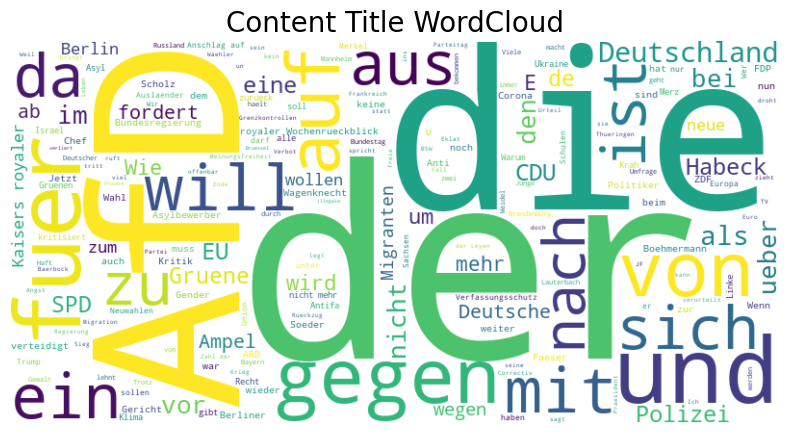

In [9]:
def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()

create_wordcloud(df['content_title'].dropna(), 'Content Title WordCloud')

split df to labelled and not labelled

In [10]:
df['has_label'] = df[labels].notna().any(axis=1)
labelled_df = df[df['has_label']]
unlabelled_df = df[~df['has_label']]

print(f"Labelled Data: {len(labelled_df)} rows")
print(f"Unlabelled Data: {len(unlabelled_df)} rows")

Labelled Data: 79 rows
Unlabelled Data: 926 rows


In [11]:
labelled_df.head()

,news_outlet,provenance,query_keywords,creation_date,last_modified,crawl_date,author_person,author_organization,news_keywords,content_title,content_description,content_body,Fake News,Extreme bias,clickbait,credible,body_len,has_label
1,jungefreiheit,https://jungefreiheit.de/debatte/kommentar/202...,"schi, christ, ns, us, ss, sp",NaN,NaT,2024-11-21,NaN,NaN,"Berlin, Diskothek, Gender, Geschlechtsidentitaet",Zwei Seelen und 53 Geschlechter,Im Berliner Nachtleben geht es nicht nur ums p...,Wir befinden uns im Jahr 2024 nach Christus. G...,1.0,1.0,1.0,0.0,805.0,True
4,jungefreiheit,https://jungefreiheit.de/politik/deutschland/2...,"muslim, asyl, schi, demo, ns, us, ss, afd, sp",NaN,NaT,2024-11-21,NaN,NaN,"AfD, Bundesamt fuer Verfassungsschutz, Junge A...",Verfassungsschutz darf AfD-Jugend als gesicher...,Die Junge Alternative wird vom Verfassungsschu...,Die Koelner Richter bestaetigten mit ihrem nun...,0.0,1.0,0.0,1.0,1684.0,True
5,jungefreiheit,https://jungefreiheit.de/debatte/kommentar/202...,"israel, christ, klima, pandemie, kultur, cdu, ...",NaN,NaT,2024-11-21,NaN,NaN,"Christentum, EKD, Evangelische Kirche, Jesus C...",Weihnachten in Zeiten der Kirchenkrise: Kein P...,Die Zeit vor Weihnachten sorgt fuer erneute De...,"Koennen, ja duerfen wir noch Weihnachten feier...",1.0,1.0,1.0,0.0,6512.0,True
6,jungefreiheit,https://jungefreiheit.de/wirtschaft/2024/neue-...,"politik, klima, ns, cdu, us, ss, sp",NaN,NaT,2024-11-21,NaN,NaN,"Batterien, Elektromobilitaet, EU, Ladesaeulen,...",Neue Zweifel an von der Leyens E-Auto-Diktat,Der Europaeische Rechnungshof kritisiert das v...,LUXEMBURG. Der Europaeische Rechnungshof hat Z...,0.0,0.0,0.0,1.0,1808.0,True
17,jungefreiheit,https://jungefreiheit.de/politik/deutschland/2...,"regierung, asyl, schi, politik, migration, ns,...",NaN,NaT,2024-11-21,NaN,NaN,"Gewalt, Kriminalitaet, Tunesier",80 Prozent der jungen Tunesier waren Tatverdae...,"Die Bundesregierung behauptet, Herkunft und Kr...",SCHWERIN. Die Kriminalitaetsbelastung junger T...,1.0,1.0,1.0,0.0,1346.0,True


encode labels

In [12]:
def encode_labels(row, labels):
    return [int(row[label]) for label in labels]

labelled_df['label'] = labelled_df.apply(lambda row: encode_labels(row, labels), axis=1)

labelled_df = labelled_df.rename(
    columns={
        'content_title': 'title',
        'content_description': 'description',
        'content_body': 'body'
    }
)

C:\Users\hanna\AppData\Local\Temp\ipykernel_14464\55246372.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labelled_df['label'] = labelled_df.apply(lambda row: encode_labels(row, labels), axis=1)


In [13]:
labelled_df.head()

,news_outlet,provenance,query_keywords,creation_date,last_modified,crawl_date,author_person,author_organization,news_keywords,title,description,body,Fake News,Extreme bias,clickbait,credible,body_len,has_label,label
1,jungefreiheit,https://jungefreiheit.de/debatte/kommentar/202...,"schi, christ, ns, us, ss, sp",NaN,NaT,2024-11-21,NaN,NaN,"Berlin, Diskothek, Gender, Geschlechtsidentitaet",Zwei Seelen und 53 Geschlechter,Im Berliner Nachtleben geht es nicht nur ums p...,Wir befinden uns im Jahr 2024 nach Christus. G...,1.0,1.0,1.0,0.0,805.0,True,"[1, 1, 1, 0]"
4,jungefreiheit,https://jungefreiheit.de/politik/deutschland/2...,"muslim, asyl, schi, demo, ns, us, ss, afd, sp",NaN,NaT,2024-11-21,NaN,NaN,"AfD, Bundesamt fuer Verfassungsschutz, Junge A...",Verfassungsschutz darf AfD-Jugend als gesicher...,Die Junge Alternative wird vom Verfassungsschu...,Die Koelner Richter bestaetigten mit ihrem nun...,0.0,1.0,0.0,1.0,1684.0,True,"[0, 1, 0, 1]"
5,jungefreiheit,https://jungefreiheit.de/debatte/kommentar/202...,"israel, christ, klima, pandemie, kultur, cdu, ...",NaN,NaT,2024-11-21,NaN,NaN,"Christentum, EKD, Evangelische Kirche, Jesus C...",Weihnachten in Zeiten der Kirchenkrise: Kein P...,Die Zeit vor Weihnachten sorgt fuer erneute De...,"Koennen, ja duerfen wir noch Weihnachten feier...",1.0,1.0,1.0,0.0,6512.0,True,"[1, 1, 1, 0]"
6,jungefreiheit,https://jungefreiheit.de/wirtschaft/2024/neue-...,"politik, klima, ns, cdu, us, ss, sp",NaN,NaT,2024-11-21,NaN,NaN,"Batterien, Elektromobilitaet, EU, Ladesaeulen,...",Neue Zweifel an von der Leyens E-Auto-Diktat,Der Europaeische Rechnungshof kritisiert das v...,LUXEMBURG. Der Europaeische Rechnungshof hat Z...,0.0,0.0,0.0,1.0,1808.0,True,"[0, 0, 0, 1]"
17,jungefreiheit,https://jungefreiheit.de/politik/deutschland/2...,"regierung, asyl, schi, politik, migration, ns,...",NaN,NaT,2024-11-21,NaN,NaN,"Gewalt, Kriminalitaet, Tunesier",80 Prozent der jungen Tunesier waren Tatverdae...,"Die Bundesregierung behauptet, Herkunft und Kr...",SCHWERIN. Die Kriminalitaetsbelastung junger T...,1.0,1.0,1.0,0.0,1346.0,True,"[1, 1, 1, 0]"


we can drop, whatever we dont need, later

export data

In [14]:
labelled_df.to_csv(r'C:\github\news\news\german-news\preprocess data\data_ready_for_analysis\labelled\jf_labelled_data.csv', index=False)
unlabelled_df.to_csv(r'C:\github\news\news\german-news\preprocess data\data_ready_for_analysis\unlabelled\jf_unlabelled_data.csv', index=False)